In [5]:
# Generate a toy dataset for the demo
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier


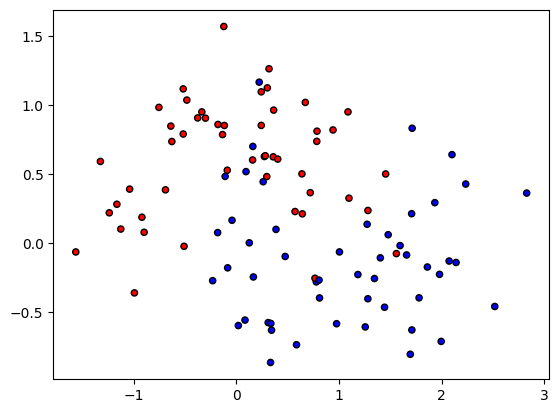

In [11]:
# Generate a 2-dimensional dataset with the shape like the moon, with 2 classess
X, y = make_moons(n_samples=100, noise=0.3, random_state=42)

# Visualise the data
cm_bright = ListedColormap(["#FF0000", "#0000FF"])
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, edgecolor="k", s=20)
plt.show()

In [12]:
# split into training and test part
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [132]:
# Build a MLP Classifier
clf = MLPClassifier(hidden_layer_sizes=[10, 10],
                    activation='tanh',
                    solver="sgd",
                    alpha=0.01,
                    batch_size=1,
                    learning_rate='constant',
                    learning_rate_init=0.001,
                    max_iter=200,
                    early_stopping=True,
                    random_state=42)

clf.fit(X_train, y_train)

MLPClassifier(activation='tanh', alpha=0.01, batch_size=1, early_stopping=True,
              hidden_layer_sizes=[10, 10], random_state=42, solver='sgd')

In [133]:
# Show the testing performance
score = clf.score(X_test, y_test)
print("The accuracy is: ", score)

The accuracy is:  0.7666666666666667


In [134]:
# Show some attributes of the trained model
print("Number of features: ", clf.n_features_in_)
print("Number of outputs: ", clf.n_outputs_)

Number of features:  2
Number of outputs:  1


In [135]:
# Show the weights of the network
print("Weights of the network: ")
for i in clf.coefs_:
  print("Weight matrix ", i.shape)
  print(i)

Weights of the network: 
Weight matrix  (2, 10)
[[-2.68627895e-01  5.72293896e-01  3.21442779e-01  1.89484653e-01
  -4.59958291e-01 -4.26587622e-01 -6.36523592e-01  5.11126078e-01
  -1.12469901e-04  4.26901287e-01]
 [-6.12406294e-01  7.12978224e-01  4.65136774e-01 -4.29742556e-01
  -4.64176869e-01 -4.94414661e-01 -2.53832693e-01  3.64192126e-02
  -3.17738507e-04 -3.63481420e-01]]
Weight matrix  (10, 10)
[[ 0.15070652 -0.37144654 -0.47153752  0.47254501  0.49135781  0.30456693
  -0.20387026 -0.43317597  0.17432015 -0.07328186]
 [-0.39656471 -0.01628807 -0.50446828  0.43325216 -0.26847885  0.15318231
  -0.20183765  0.02162466  0.04121334 -0.35060475]
 [ 0.50817129  0.29506411  0.4757075   0.42486574  0.10486037  0.45043862
  -0.44606634 -0.32960592 -0.49163628 -0.1926196 ]
 [-0.05553281 -0.27977135  0.35445995 -0.18480499 -0.26300838 -0.02020886
  -0.37549035  0.33102318 -0.50736757  0.50511491]
 [ 0.28267366 -0.31842068 -0.53519026  0.34920996  0.23073365  0.26788704
   0.29126561 -0.46

In [136]:
# Show the bias of the network
print("Intercepts of the network: ")
for i in clf.intercepts_:
  print("Intercept ", i.shape)
  print(i)

Intercepts of the network: 
Intercept  (10,)
[ 0.15610777 -0.50233335 -0.28320025 -0.17401109 -0.06481572  0.38745
 -0.40979416  0.01999523  0.13785276 -0.58951408]
Intercept  (10,)
[-0.10718931 -0.29634475 -0.41557484 -0.16996886  0.4868593  -0.18059553
  0.01886016  0.21971244 -0.16679341  0.52796284]
Intercept  (1,)
[0.58657171]


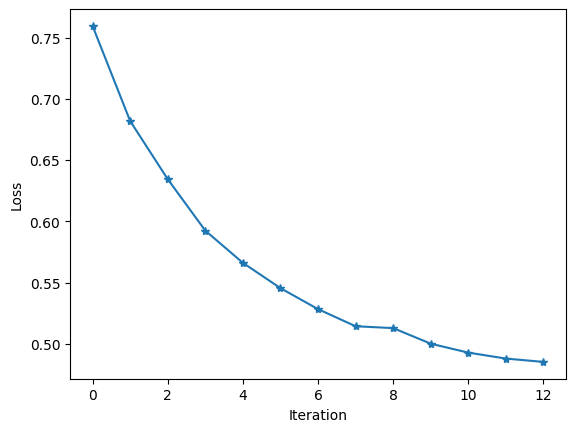

In [137]:
# Visualise the loss change over iterations
plt.figure()
plt.plot(clf.loss_curve_, '*-')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()